In [ ]:
import numpy as np
import scipy.io as sio
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sfm = sio.loadmat('sfm_points.mat')
center = np.zeros((2,1))
W = np.zeros((20, 600))

for i in range(10):
    tmp = sfm["image_points"][:, :, i]
    len = tmp.shape[1]
    x = np.sum(tmp[0, :])/len
    y = np.sum(tmp[1, :])/len
    points = np.array([x,y])
    center = np.append(center, points.reshape(-1,1), axis=1)

center = center[:, 1:]


for i in range(10):
    tmp = sfm["image_points"][:, :, i] - center[:, i].reshape(2,1)
    W[i] = tmp[0, :]
    W[i+10] = tmp[1, :]
#print(W)
print ('t_i (first camera): \n', center[:,0])
print ('Center for each camera t_i: \n',center[:,0:])

t_i (first camera): 
 [2.36847579e-17 8.28966525e-17]
Center for each camera t_i: 
 [[ 2.36847579e-17 -3.55271368e-17  9.47390314e-17  3.07901852e-16
   8.28966525e-17  4.73695157e-17  4.73695157e-17  7.10542736e-17
   0.00000000e+00 -1.18423789e-17]
 [ 8.28966525e-17  4.73695157e-17  0.00000000e+00  1.18423789e-17
  -3.55271368e-17  0.00000000e+00  2.36847579e-17 -7.10542736e-17
   4.73695157e-17  1.42108547e-16]]


In [ ]:
matrix = sio.loadmat('sfm_points.mat')['image_points']
# print('Image Points matrix is:')
# print(matrix.shape)
tv = np.mean(matrix,axis=1)
print('Translation Vector t is:\n',tv)

Translation Vector t is:
 [[ 5.49560397e-17  3.31216536e-17 -1.06118817e-16  4.27435864e-17
  -9.25185854e-19 -7.75305746e-17  1.22124533e-17  4.99600361e-18
  -9.43689571e-18 -2.08166817e-18]
 [-7.03141249e-18  3.97829917e-18  1.24900090e-17 -1.85962357e-17
  -3.99217696e-17  8.83552490e-17  6.36527867e-17  2.71773345e-18
  -2.14643118e-17  3.85802501e-17]]


In [ ]:
#for center matrix
cm = np.zeros(matrix.shape)
for i in range(cm.shape[0]):
    for j in range(cm.shape[2]):
        cm[i,:,j] = matrix[i,:,j] - tv[i][j]
#for measure matrix
mm = np.zeros([matrix.shape[0]*matrix.shape[2],matrix.shape[1]])
for i in range(matrix.shape[1]):
    for j in range(matrix.shape[2]):
            mm[2*j,i] = cm[0,i,j]
            mm[2*j+1,i] = cm[1,i,j]

In [ ]:
Ut, Dt, Vt = np.linalg.svd(mm)
Vt = Vt.T
Dt = Dt * np.identity(Dt.shape[0])
# print (Ut.shape)
# print (Dt.shape)
# print (Vt.shape)
location = np.dot(Ut[:,:3],Dt[:3,:3])
print('location for cameras:\n',location)
Mi = np.matmul(Ut[:, :3], np.diag(Dt[:3]))
print("Mi_shape :", Mi.shape)

location for cameras:
 [[-7.50914219  3.30837904 -3.71763726]
 [-4.53754376 -1.57773527  7.74574759]
 [ 0.17858821 -8.56620251 -2.47587867]
 [ 9.05169424  0.12603637  0.70587237]
 [ 8.25306132  2.16911022 -3.48212517]
 [-0.13132314 -7.68175234 -4.32518806]
 [-3.76826539 -8.34775199  1.20087007]
 [ 8.27600638 -3.50666717  0.57004455]
 [-0.73461089 -8.39784553 -2.88977146]
 [-8.50036578  1.60529571 -2.55252038]
 [ 8.45690903 -2.56525708 -1.79392742]
 [-3.28948312 -6.10374195 -5.44642826]
 [-2.96665571 -7.78843781 -3.22986642]
 [ 8.45107965 -1.64131526 -2.78078037]
 [-1.4368307  -8.62307292  3.07678742]
 [-7.95142326 -0.23710514 -4.1742912 ]
 [ 8.6277954  -2.12325785 -1.6361374 ]
 [-0.41749971  4.10544054 -8.14813897]
 [ 7.44257036 -3.77728996  3.4002285 ]
 [-5.22854825 -5.82482627  5.11580038]]
Mi_shape : (20,)


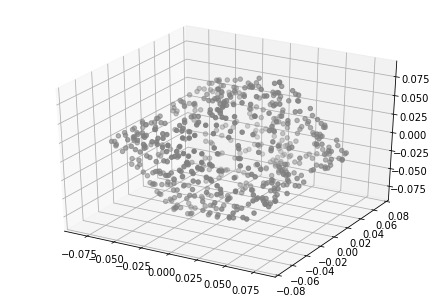

In [ ]:
points = Vt[:,:3]
pylab.ion()#https://www.programcreek.com/python/example/60410/pylab.ion
Axes3D(pylab.figure()).scatter3D(points[:,0],points[:,1],points[:,2],marker='o',color='grey')

In [ ]:
print('First 10 cameras locations are: \n',location[:10])
print('First 10 translation vectors \n',tv[:10])
print('3d coordinates of first 10 world points\n',points[:10])

First 10 cameras locations are: 
 [[-7.50914219  3.30837904 -3.71763726]
 [-4.53754376 -1.57773527  7.74574759]
 [ 0.17858821 -8.56620251 -2.47587867]
 [ 9.05169424  0.12603637  0.70587237]
 [ 8.25306132  2.16911022 -3.48212517]
 [-0.13132314 -7.68175234 -4.32518806]
 [-3.76826539 -8.34775199  1.20087007]
 [ 8.27600638 -3.50666717  0.57004455]
 [-0.73461089 -8.39784553 -2.88977146]
 [-8.50036578  1.60529571 -2.55252038]]
First 10 translation vectors 
 [[ 5.49560397e-17  3.31216536e-17 -1.06118817e-16  4.27435864e-17
  -9.25185854e-19 -7.75305746e-17  1.22124533e-17  4.99600361e-18
  -9.43689571e-18 -2.08166817e-18]
 [-7.03141249e-18  3.97829917e-18  1.24900090e-17 -1.85962357e-17
  -3.99217696e-17  8.83552490e-17  6.36527867e-17  2.71773345e-18
  -2.14643118e-17  3.85802501e-17]]
3d coordinates of first 10 world points
 [[ 0.00577163  0.06460628 -0.02497615]
 [ 0.0005761   0.06885363 -0.03458151]
 [-0.04293585  0.06330479  0.02861711]
 [ 0.04745038  0.04904207 -0.01257547]
 [-0.0421018